# Neural Networks image recognition - ConvNet

1. Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data. **
2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 
3. Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.
4. Compare these results with the previous week where we used a MultiLayer Perceptron (this week we use a ConvNet). 

# Neural Networks - Image Recognition 

In [30]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend

## Conv Net
Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).


## Without Noise

In [31]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [32]:
batch_size = 128
num_classes = 10
epochs = 20

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20


2022-11-07 22:55:50.195587: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 2.2890 - accuracy: 0.1327

2022-11-07 22:56:00.339846: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 11s 23ms/step - loss: 2.2890 - accuracy: 0.1327 - val_loss: 2.2667 - val_accuracy: 0.2267
Epoch 2/20
469/469 [==============================] - 10s 22ms/step - loss: 2.2508 - accuracy: 0.2243 - val_loss: 2.2219 - val_accuracy: 0.3756
Epoch 3/20
469/469 [==============================] - 10s 22ms/step - loss: 2.2023 - accuracy: 0.3122 - val_loss: 2.1608 - val_accuracy: 0.4910
Epoch 4/20
469/469 [==============================] - 10s 21ms/step - loss: 2.1335 - accuracy: 0.3945 - val_loss: 2.0730 - val_accuracy: 0.5912
Epoch 5/20
469/469 [==============================] - 10s 22ms/step - loss: 2.0359 - accuracy: 0.4652 - val_loss: 1.9480 - val_accuracy: 0.6617
Epoch 6/20
469/469 [==============================] - 11s 23ms/step - loss: 1.9025 - accuracy: 0.5221 - val_loss: 1.7782 - val_accuracy: 0.7049
Epoch 7/20
469/469 [==============================] - 10s 22ms/step - loss: 1.7355 - accuracy: 0.5663 - val_loss: 1.5681 - val_accuracy: 0.7515
Epo

## With Noise

In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train_noise = np.random.normal(x_train)
x_test_noise = np.random.normal(x_test)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


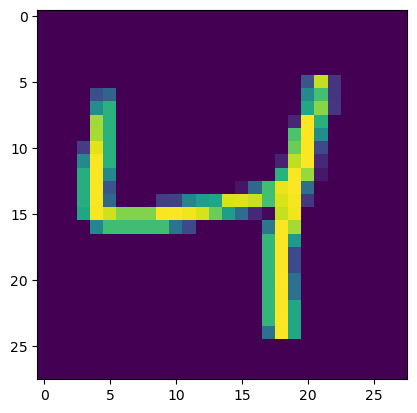

In [35]:
plt.imshow(x_train[2].reshape(28,28))

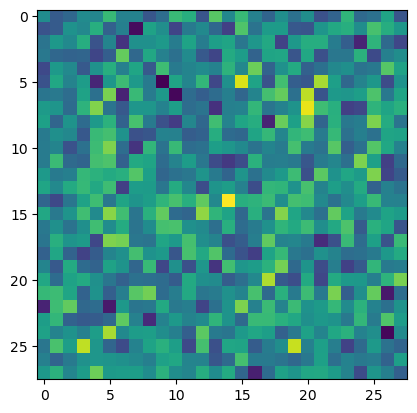

In [36]:
plt.imshow(x_train_noise[2].reshape(28,28))

In [37]:
batch_size = 128
num_classes = 10
epochs = 20

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history_n = model.fit(x_train_noise, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_noise, y_test))
score = model.evaluate(x_test_noise, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20


2022-11-07 22:59:23.826415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 2.3249 - accuracy: 0.1053

2022-11-07 22:59:34.083649: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 11s 23ms/step - loss: 2.3249 - accuracy: 0.1053 - val_loss: 2.2904 - val_accuracy: 0.1280
Epoch 2/20
469/469 [==============================] - 11s 24ms/step - loss: 2.3028 - accuracy: 0.1173 - val_loss: 2.2807 - val_accuracy: 0.1552
Epoch 3/20
469/469 [==============================] - 10s 22ms/step - loss: 2.2921 - accuracy: 0.1303 - val_loss: 2.2717 - val_accuracy: 0.1792
Epoch 4/20
469/469 [==============================] - 11s 23ms/step - loss: 2.2824 - accuracy: 0.1401 - val_loss: 2.2614 - val_accuracy: 0.2050
Epoch 5/20
469/469 [==============================] - 11s 23ms/step - loss: 2.2720 - accuracy: 0.1537 - val_loss: 2.2486 - val_accuracy: 0.2325
Epoch 6/20
469/469 [==============================] - 11s 23ms/step - loss: 2.2609 - accuracy: 0.1664 - val_loss: 2.2338 - val_accuracy: 0.2661
Epoch 7/20
469/469 [==============================] - 11s 23ms/step - loss: 2.2474 - accuracy: 0.1806 - val_loss: 2.2156 - val_accuracy: 0.3064
Epo

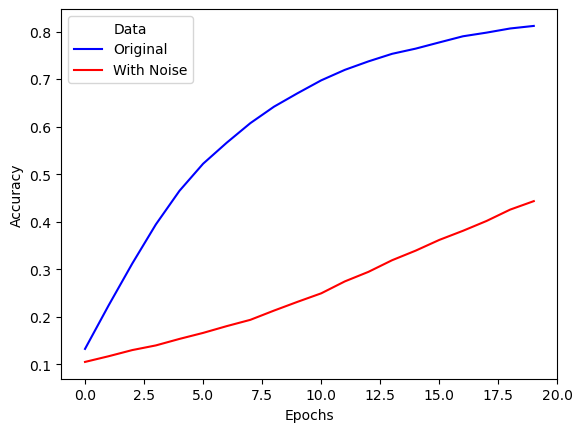

In [38]:
plt.plot(history.history['accuracy'],c='b',label='Original')
plt.plot(history_n.history['accuracy'],c='red',label='With Noise')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.xlim(-1,20)
plt.legend(title='Data')
plt.show()

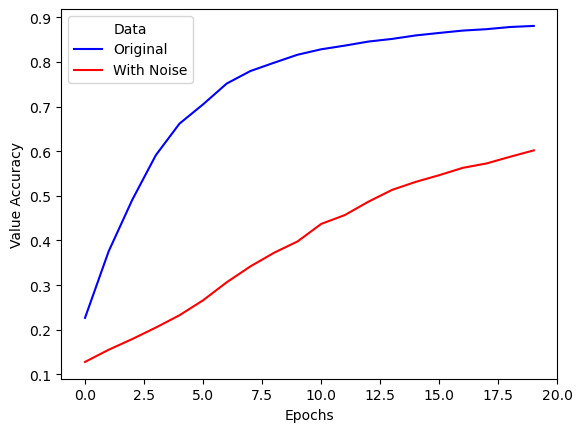

In [39]:
plt.plot(history.history['val_accuracy'],c='b',label='Original')
plt.plot(history_n.history['val_accuracy'],c='red',label='With Noise')
plt.ylabel('Value Accuracy')
plt.xlabel('Epochs')
plt.xlim(-1,20)
plt.legend(title='Data')
plt.show()

## Varying Scales

In [40]:
scales = [.1, .5, 1.0, 2.0, 4.0]
accuracies = []
vals = []

for scale in scales:
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    if backend.image_data_format() == 'channels_first':
        x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
        x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
        x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255

    x_train = np.random.normal(x_train,scale=scale)
    x_test = np.random.normal(x_test,scale=scale)
    
    batch_size = 128
    num_classes = 10
    epochs = 20
    
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

    history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    
    accuracies.append(history.history['accuracy'])
    vals.append(history.history['val_accuracy'])

Epoch 1/20


2022-11-07 23:03:09.501590: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 2.2882 - accuracy: 0.1323

2022-11-07 23:03:20.077842: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 12s 24ms/step - loss: 2.2882 - accuracy: 0.1323 - val_loss: 2.2646 - val_accuracy: 0.2250
Epoch 2/20
469/469 [==============================] - 11s 24ms/step - loss: 2.2502 - accuracy: 0.2185 - val_loss: 2.2213 - val_accuracy: 0.3574
Epoch 3/20
469/469 [==============================] - 11s 24ms/step - loss: 2.2042 - accuracy: 0.2945 - val_loss: 2.1653 - val_accuracy: 0.4304
Epoch 4/20
469/469 [==============================] - 11s 23ms/step - loss: 2.1419 - accuracy: 0.3681 - val_loss: 2.0895 - val_accuracy: 0.5121
Epoch 5/20
469/469 [==============================] - 11s 23ms/step - loss: 2.0633 - accuracy: 0.4277 - val_loss: 1.9872 - val_accuracy: 0.6122
Epoch 6/20
469/469 [==============================] - 11s 24ms/step - loss: 1.9557 - accuracy: 0.4889 - val_loss: 1.8549 - val_accuracy: 0.6743
Epoch 7/20
469/469 [==============================] - 12s 25ms/step - loss: 1.8247 - accuracy: 0.5355 - val_loss: 1.6944 - val_accuracy: 0.7106
Epo

2022-11-07 23:07:09.459645: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 2.3019 - accuracy: 0.1146

2022-11-07 23:07:21.489565: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 13s 27ms/step - loss: 2.3019 - accuracy: 0.1146 - val_loss: 2.2755 - val_accuracy: 0.1961
Epoch 2/20
469/469 [==============================] - 11s 23ms/step - loss: 2.2746 - accuracy: 0.1522 - val_loss: 2.2465 - val_accuracy: 0.3222
Epoch 3/20
469/469 [==============================] - 12s 26ms/step - loss: 2.2476 - accuracy: 0.1903 - val_loss: 2.2113 - val_accuracy: 0.4216
Epoch 4/20
469/469 [==============================] - 11s 24ms/step - loss: 2.2142 - accuracy: 0.2288 - val_loss: 2.1671 - val_accuracy: 0.4954
Epoch 5/20
469/469 [==============================] - 11s 24ms/step - loss: 2.1708 - accuracy: 0.2754 - val_loss: 2.1123 - val_accuracy: 0.5457
Epoch 6/20
469/469 [==============================] - 13s 27ms/step - loss: 2.1176 - accuracy: 0.3270 - val_loss: 2.0465 - val_accuracy: 0.5969
Epoch 7/20
469/469 [==============================] - 12s 26ms/step - loss: 2.0554 - accuracy: 0.3709 - val_loss: 1.9674 - val_accuracy: 0.6314
Epo

2022-11-07 23:11:06.865854: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 2.3293 - accuracy: 0.1027

2022-11-07 23:11:17.134230: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 11s 24ms/step - loss: 2.3293 - accuracy: 0.1027 - val_loss: 2.2890 - val_accuracy: 0.1409
Epoch 2/20
469/469 [==============================] - 11s 23ms/step - loss: 2.2984 - accuracy: 0.1218 - val_loss: 2.2719 - val_accuracy: 0.1892
Epoch 3/20
469/469 [==============================] - 11s 24ms/step - loss: 2.2802 - accuracy: 0.1372 - val_loss: 2.2548 - val_accuracy: 0.2369
Epoch 4/20
469/469 [==============================] - 11s 23ms/step - loss: 2.2635 - accuracy: 0.1581 - val_loss: 2.2343 - val_accuracy: 0.2875
Epoch 5/20
469/469 [==============================] - 11s 23ms/step - loss: 2.2454 - accuracy: 0.1792 - val_loss: 2.2090 - val_accuracy: 0.3386
Epoch 6/20
469/469 [==============================] - 11s 24ms/step - loss: 2.2222 - accuracy: 0.1974 - val_loss: 2.1769 - val_accuracy: 0.3826
Epoch 7/20
469/469 [==============================] - 11s 24ms/step - loss: 2.1947 - accuracy: 0.2222 - val_loss: 2.1392 - val_accuracy: 0.4161
Epo

2022-11-07 23:14:58.668909: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 2.4057 - accuracy: 0.1022

2022-11-07 23:15:10.360470: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 13s 27ms/step - loss: 2.4057 - accuracy: 0.1022 - val_loss: 2.3007 - val_accuracy: 0.1217
Epoch 2/20
469/469 [==============================] - 13s 27ms/step - loss: 2.3371 - accuracy: 0.1071 - val_loss: 2.2929 - val_accuracy: 0.1367
Epoch 3/20
469/469 [==============================] - 13s 27ms/step - loss: 2.3142 - accuracy: 0.1118 - val_loss: 2.2919 - val_accuracy: 0.1413
Epoch 4/20
469/469 [==============================] - 13s 27ms/step - loss: 2.3039 - accuracy: 0.1162 - val_loss: 2.2918 - val_accuracy: 0.1421
Epoch 5/20
469/469 [==============================] - 12s 25ms/step - loss: 2.3004 - accuracy: 0.1191 - val_loss: 2.2903 - val_accuracy: 0.1505
Epoch 6/20
469/469 [==============================] - 12s 26ms/step - loss: 2.2960 - accuracy: 0.1203 - val_loss: 2.2875 - val_accuracy: 0.1524
Epoch 7/20
469/469 [==============================] - 12s 25ms/step - loss: 2.2922 - accuracy: 0.1247 - val_loss: 2.2840 - val_accuracy: 0.1669
Epo

2022-11-07 23:19:05.124882: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 2.6343 - accuracy: 0.1008

2022-11-07 23:19:16.524050: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 13s 26ms/step - loss: 2.6343 - accuracy: 0.1008 - val_loss: 2.3219 - val_accuracy: 0.1016
Epoch 2/20
469/469 [==============================] - 12s 26ms/step - loss: 2.3849 - accuracy: 0.1006 - val_loss: 2.3044 - val_accuracy: 0.1061
Epoch 3/20
469/469 [==============================] - 12s 25ms/step - loss: 2.3308 - accuracy: 0.1026 - val_loss: 2.3025 - val_accuracy: 0.1066
Epoch 4/20
469/469 [==============================] - 12s 25ms/step - loss: 2.3149 - accuracy: 0.1028 - val_loss: 2.3023 - val_accuracy: 0.1037
Epoch 5/20
469/469 [==============================] - 12s 25ms/step - loss: 2.3091 - accuracy: 0.1015 - val_loss: 2.3022 - val_accuracy: 0.1077
Epoch 6/20
469/469 [==============================] - 12s 25ms/step - loss: 2.3060 - accuracy: 0.1045 - val_loss: 2.3023 - val_accuracy: 0.1098
Epoch 7/20
469/469 [==============================] - 11s 24ms/step - loss: 2.3051 - accuracy: 0.1045 - val_loss: 2.3023 - val_accuracy: 0.1127
Epo

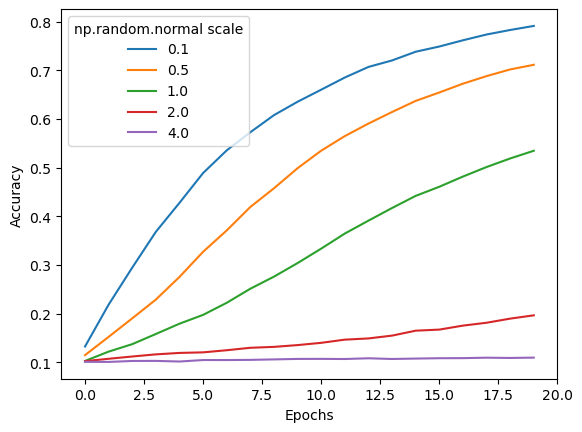

In [41]:
for i in range(0,len(accuracies)):
    plt.plot(accuracies[i],label=scales[i])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.xlim(-1,20)
plt.legend(title='np.random.normal scale')
plt.show()

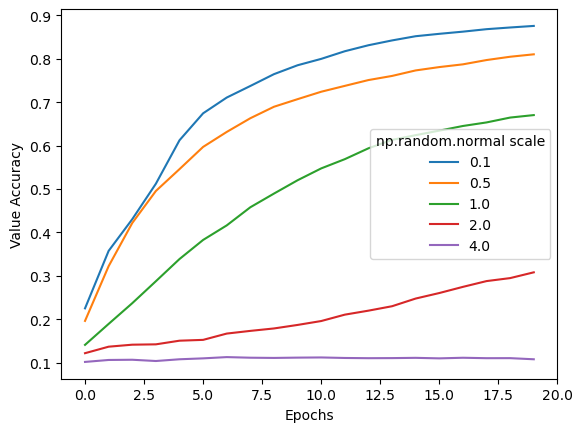

In [42]:
for i in range(0,len(vals)):
    plt.plot(vals[i],label=scales[i])
plt.ylabel('Value Accuracy')
plt.xlabel('Epochs')
plt.xlim(-1,20)
plt.legend(title='np.random.normal scale')
plt.show()

## Comparison with Last Week

In [43]:
scales = [.1, .5, 1.0, 2.0, 4.0]
accuracies_mlp = []
vals_mlp = []

for scale in scales:
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    
    x_train = x_train.reshape(60000, 784)
    x_test = x_test.reshape(10000, 784)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255

    x_train = np.random.normal(x_train,scale=scale)
    x_test = np.random.normal(x_test,scale=scale)
    
    batch_size = 128
    num_classes = 10
    epochs = 20
    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    model.summary()

    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    
    accuracies_mlp.append(history.history['accuracy'])
    vals_mlp.append(history.history['val_accuracy'])

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 512)               401920    
                                                                 
 dropout_48 (Dropout)        (None, 512)               0         
                                                                 
 dense_52 (Dense)            (None, 512)               262656    
                                                                 
 dropout_49 (Dropout)        (None, 512)               0         
                                                                 
 dense_53 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20


2022-11-07 23:23:01.951566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.2631 - accuracy: 0.9179

2022-11-07 23:23:08.847260: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 8s 16ms/step - loss: 0.2631 - accuracy: 0.9179 - val_loss: 0.1266 - val_accuracy: 0.9594
Epoch 2/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0968 - accuracy: 0.9708 - val_loss: 0.1004 - val_accuracy: 0.9696
Epoch 3/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0608 - accuracy: 0.9815 - val_loss: 0.0902 - val_accuracy: 0.9736
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0402 - accuracy: 0.9875 - val_loss: 0.0965 - val_accuracy: 0.9759
Epoch 5/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0297 - accuracy: 0.9902 - val_loss: 0.1147 - val_accuracy: 0.9742
Epoch 6/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0236 - accuracy: 0.9925 - val_loss: 0.1138 - val_accuracy: 0.9757
Epoch 7/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0199 - accuracy: 0.9934 - val_loss: 0.1179 - val_accuracy: 0.9766
Epoch 8/20

2022-11-07 23:25:24.247061: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.5475 - accuracy: 0.8229

2022-11-07 23:25:31.279292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 8s 16ms/step - loss: 0.5475 - accuracy: 0.8229 - val_loss: 0.3112 - val_accuracy: 0.8982
Epoch 2/20
469/469 [==============================] - 7s 15ms/step - loss: 0.2410 - accuracy: 0.9230 - val_loss: 0.2823 - val_accuracy: 0.9132
Epoch 3/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1218 - accuracy: 0.9605 - val_loss: 0.3116 - val_accuracy: 0.9134
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0692 - accuracy: 0.9764 - val_loss: 0.3580 - val_accuracy: 0.9150
Epoch 5/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0489 - accuracy: 0.9836 - val_loss: 0.4122 - val_accuracy: 0.9158
Epoch 6/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0384 - accuracy: 0.9870 - val_loss: 0.5030 - val_accuracy: 0.9141
Epoch 7/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0337 - accuracy: 0.9888 - val_loss: 0.4966 - val_accuracy: 0.9149
Epoch 8/20

2022-11-07 23:27:49.411050: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 1.0816 - accuracy: 0.6326

2022-11-07 23:27:56.427196: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 8s 16ms/step - loss: 1.0816 - accuracy: 0.6326 - val_loss: 0.8133 - val_accuracy: 0.7293
Epoch 2/20
469/469 [==============================] - 7s 15ms/step - loss: 0.6620 - accuracy: 0.7774 - val_loss: 0.7507 - val_accuracy: 0.7514
Epoch 3/20
469/469 [==============================] - 7s 15ms/step - loss: 0.4488 - accuracy: 0.8516 - val_loss: 0.7742 - val_accuracy: 0.7595
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 0.2942 - accuracy: 0.9017 - val_loss: 0.8913 - val_accuracy: 0.7513
Epoch 5/20
469/469 [==============================] - 7s 15ms/step - loss: 0.2027 - accuracy: 0.9298 - val_loss: 1.0578 - val_accuracy: 0.7514
Epoch 6/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1577 - accuracy: 0.9460 - val_loss: 1.1620 - val_accuracy: 0.7501
Epoch 7/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1331 - accuracy: 0.9546 - val_loss: 1.2956 - val_accuracy: 0.7450
Epoch 8/20

2022-11-07 23:30:12.687158: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 1.8603 - accuracy: 0.3614

2022-11-07 23:30:19.768056: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 8s 16ms/step - loss: 1.8603 - accuracy: 0.3614 - val_loss: 1.6038 - val_accuracy: 0.4473
Epoch 2/20
469/469 [==============================] - 7s 15ms/step - loss: 1.4565 - accuracy: 0.4988 - val_loss: 1.5946 - val_accuracy: 0.4511
Epoch 3/20
469/469 [==============================] - 7s 15ms/step - loss: 1.2472 - accuracy: 0.5710 - val_loss: 1.6408 - val_accuracy: 0.4396
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 1.0495 - accuracy: 0.6371 - val_loss: 1.7151 - val_accuracy: 0.4431
Epoch 5/20
469/469 [==============================] - 7s 15ms/step - loss: 0.8812 - accuracy: 0.6948 - val_loss: 1.8254 - val_accuracy: 0.4318
Epoch 6/20
469/469 [==============================] - 7s 15ms/step - loss: 0.7393 - accuracy: 0.7435 - val_loss: 1.9954 - val_accuracy: 0.4224
Epoch 7/20
469/469 [==============================] - 7s 15ms/step - loss: 0.6411 - accuracy: 0.7782 - val_loss: 2.1551 - val_accuracy: 0.4127
Epoch 8/20

2022-11-07 23:32:37.766116: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 2.4530 - accuracy: 0.1565

2022-11-07 23:32:44.823995: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 8s 16ms/step - loss: 2.4530 - accuracy: 0.1565 - val_loss: 2.1534 - val_accuracy: 0.2218
Epoch 2/20
469/469 [==============================] - 7s 15ms/step - loss: 2.0762 - accuracy: 0.2589 - val_loss: 2.1221 - val_accuracy: 0.2342
Epoch 3/20
469/469 [==============================] - 7s 15ms/step - loss: 1.9378 - accuracy: 0.3139 - val_loss: 2.1441 - val_accuracy: 0.2360
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 1.8056 - accuracy: 0.3647 - val_loss: 2.1898 - val_accuracy: 0.2231
Epoch 5/20
469/469 [==============================] - 7s 15ms/step - loss: 1.6791 - accuracy: 0.4077 - val_loss: 2.2536 - val_accuracy: 0.2165
Epoch 6/20
469/469 [==============================] - 7s 15ms/step - loss: 1.5643 - accuracy: 0.4521 - val_loss: 2.3255 - val_accuracy: 0.2146
Epoch 7/20
469/469 [==============================] - 7s 15ms/step - loss: 1.4621 - accuracy: 0.4873 - val_loss: 2.3843 - val_accuracy: 0.2108
Epoch 8/20

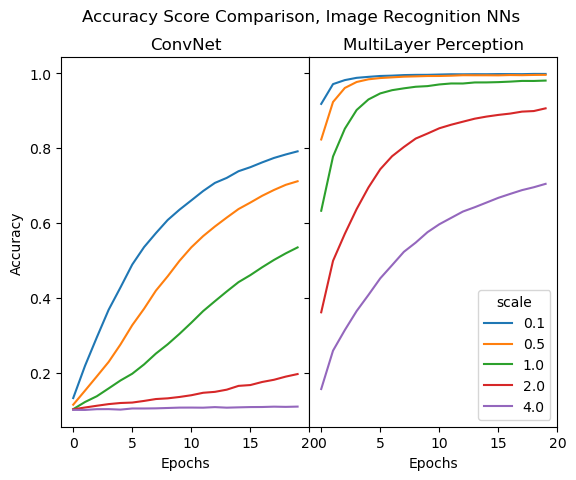

In [57]:
fig, ax = plt.subplots(1,2,sharey=True)
fig.subplots_adjust(wspace=0)

for i in range(0,len(accuracies)):
    ax[0].plot(accuracies[i],label=scales[i])
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_xlim(-1,20)
ax[0].set_title('ConvNet')

for i in range(0,len(accuracies)):
    ax[1].plot(accuracies_mlp[i],label=scales[i])
ax[1].set_xlabel('Epochs')
ax[1].set_xlim(-1,20)
ax[1].legend(title='scale')
ax[1].set_title('MultiLayer Perception')
fig.suptitle('Accuracy Score Comparison, Image Recognition NNs')
plt.show()

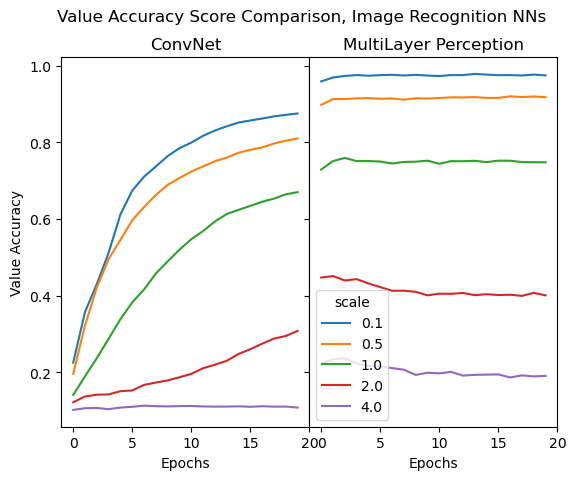

In [58]:
fig, ax = plt.subplots(1,2,sharey=True)
fig.subplots_adjust(wspace=0)

for i in range(0,len(accuracies)):
    ax[0].plot(vals[i],label=scales[i])
ax[0].set_ylabel('Value Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_xlim(-1,20)
ax[0].set_title('ConvNet')

for i in range(0,len(accuracies)):
    ax[1].plot(vals_mlp[i],label=scales[i])
ax[1].set_xlabel('Epochs')
ax[1].set_xlim(-1,20)
ax[1].legend(title='scale')
ax[1].set_title('MultiLayer Perception')
fig.suptitle('Value Accuracy Score Comparison, Image Recognition NNs')
plt.show()

As visible in the above graphs, the MultiLayer Perception (MLP) Neural Networks from last week were significantly more effective at accurately predicting the numbers in each image in the MNist dataset. MLP accuracy scores for four out of the five scale variations of the MNist dataset were higher than 80% after 20 epochs, while the ConvNet accuracy scores topped out at 80% for only one scale.